<h1 style = 'text-align: center'><b>Clustering With Random Seed</b></h1>

In [16]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
np.random.seed(11)

<h3><b>1. Create the dataset</b></h3>

- To create the dataset, we will generate data points from three clusters following a multivariate normal distribution with means at <b>(2, 2)</b>, <b>(8, 3)</b>, and <b>(3, 6)</b>, respectively. 
- Each cluster will consist of 500 data points, and the covariance matrix for all clusters will be the same and equal to the identity matrix.
- Note that each data point is a row of the data matrix.

In [17]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

N = 500

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

<h3><b>2. Visualize the dataset</b></h3>

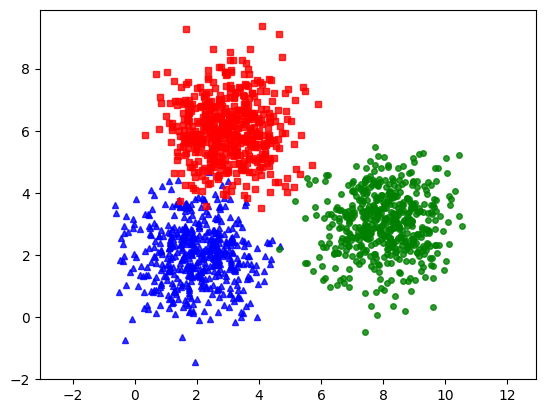

In [18]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

<h3><b>3. Create neccessary functions for K-Means clustering</b></h3>

In [19]:
# Initialize the initial centers
def kmeans_init_centers(X, K):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], K, replace=False)]

# Assign new labels to points when the center is known
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

# Update the new centers based on the data that has just been labeled.
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# Check the stopping condition of the algorithm
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

<h3><b>4. Combine all function to create k-means algorithm</b></h3>

In [20]:
def my_kmeans(X, K):
    # initialize the initial state with centers, labels and iterations
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    
    # conduct clustering until has no difference between previous and current centers
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

<h3><b>5. Apply the written K-means algorithm to the initial data</b></h3>

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


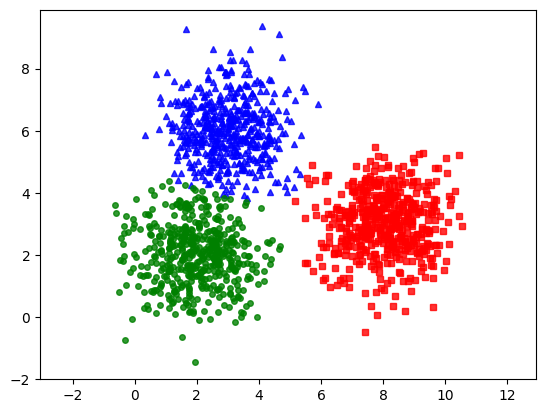

In [21]:
(centers, labels, it) = my_kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

<h3><b>6. Compare with Scikit-learn library</b></h3>

Centers found by scikit-learn:
[[2.99357611 6.03605255]
 [8.0410628  3.02094748]
 [1.97634981 2.01123694]]


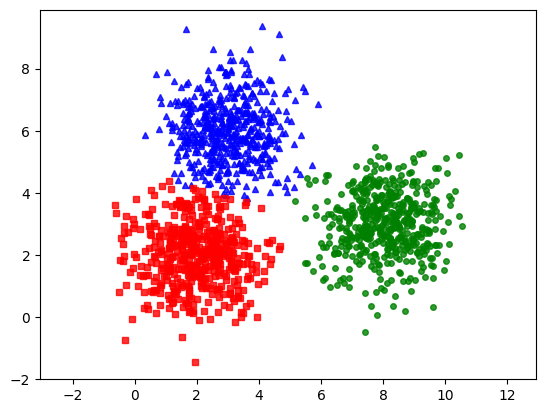

In [22]:
# using k-means in scikit-learn library
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)

pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)